In [3]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

In [10]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)


# load a session and its telemetry data
session = fastf1.get_session(2024, 'Singapore Grand Prix', 'Q')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()
pos = laps.pick_fastest().get_pos_data()




/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req        

In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:19:07.206000,NOR,4,0 days 00:01:30.724000,2.0,1.0,NaT,NaT,0 days 00:00:26.863000,0 days 00:00:38.252000,...,True,McLaren,0 days 00:17:36.482000,2024-09-21 13:03:50.319,1,NaN,False,,False,True
4,0 days 00:28:25.561000,NOR,4,0 days 00:01:30.002000,5.0,2.0,NaT,NaT,0 days 00:00:26.735000,0 days 00:00:37.824000,...,False,McLaren,0 days 00:26:55.559000,2024-09-21 13:13:09.396,1,NaN,False,,False,True
7,0 days 00:43:28.075000,NOR,4,0 days 00:01:30.007000,8.0,3.0,NaT,NaT,0 days 00:00:26.586000,0 days 00:00:37.678000,...,True,McLaren,0 days 00:41:58.068000,2024-09-21 13:28:11.905,1,NaN,False,,False,True
14,0 days 01:28:47.747000,NOR,4,0 days 00:01:29.525000,15.0,6.0,NaT,NaT,0 days 00:00:26.599000,0 days 00:00:37.630000,...,True,McLaren,0 days 01:27:18.222000,2024-09-21 14:13:32.059,1,NaN,False,,False,True
17,0 days 00:23:00.211000,VER,1,0 days 00:01:30.854000,2.0,1.0,NaT,NaT,0 days 00:00:26.800000,0 days 00:00:38.253000,...,True,Red Bull Racing,0 days 00:21:29.357000,2024-09-21 13:07:43.194,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0 days 00:23:53.596000,BOT,77,0 days 00:01:32.058000,5.0,2.0,NaT,NaT,0 days 00:00:27.229000,0 days 00:00:38.866000,...,True,Kick Sauber,0 days 00:22:21.538000,2024-09-21 13:08:35.375,1,NaN,False,,False,True
265,0 days 00:32:44.687000,BOT,77,0 days 00:01:31.572000,8.0,3.0,NaT,NaT,0 days 00:00:27.189000,0 days 00:00:38.400000,...,True,Kick Sauber,0 days 00:31:13.115000,2024-09-21 13:17:26.952,1,NaN,False,,False,True
268,0 days 00:17:33.011000,ZHO,24,0 days 00:01:33.569000,2.0,1.0,NaT,NaT,0 days 00:00:27.689000,0 days 00:00:39.479000,...,True,Kick Sauber,0 days 00:15:59.442000,2024-09-21 13:02:13.279,1,NaN,False,,False,True
271,0 days 00:23:40.707000,ZHO,24,0 days 00:01:32.514000,5.0,2.0,NaT,NaT,0 days 00:00:27.406000,0 days 00:00:38.914000,...,True,Kick Sauber,0 days 00:22:08.193000,2024-09-21 13:08:22.030,1,NaN,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [7]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

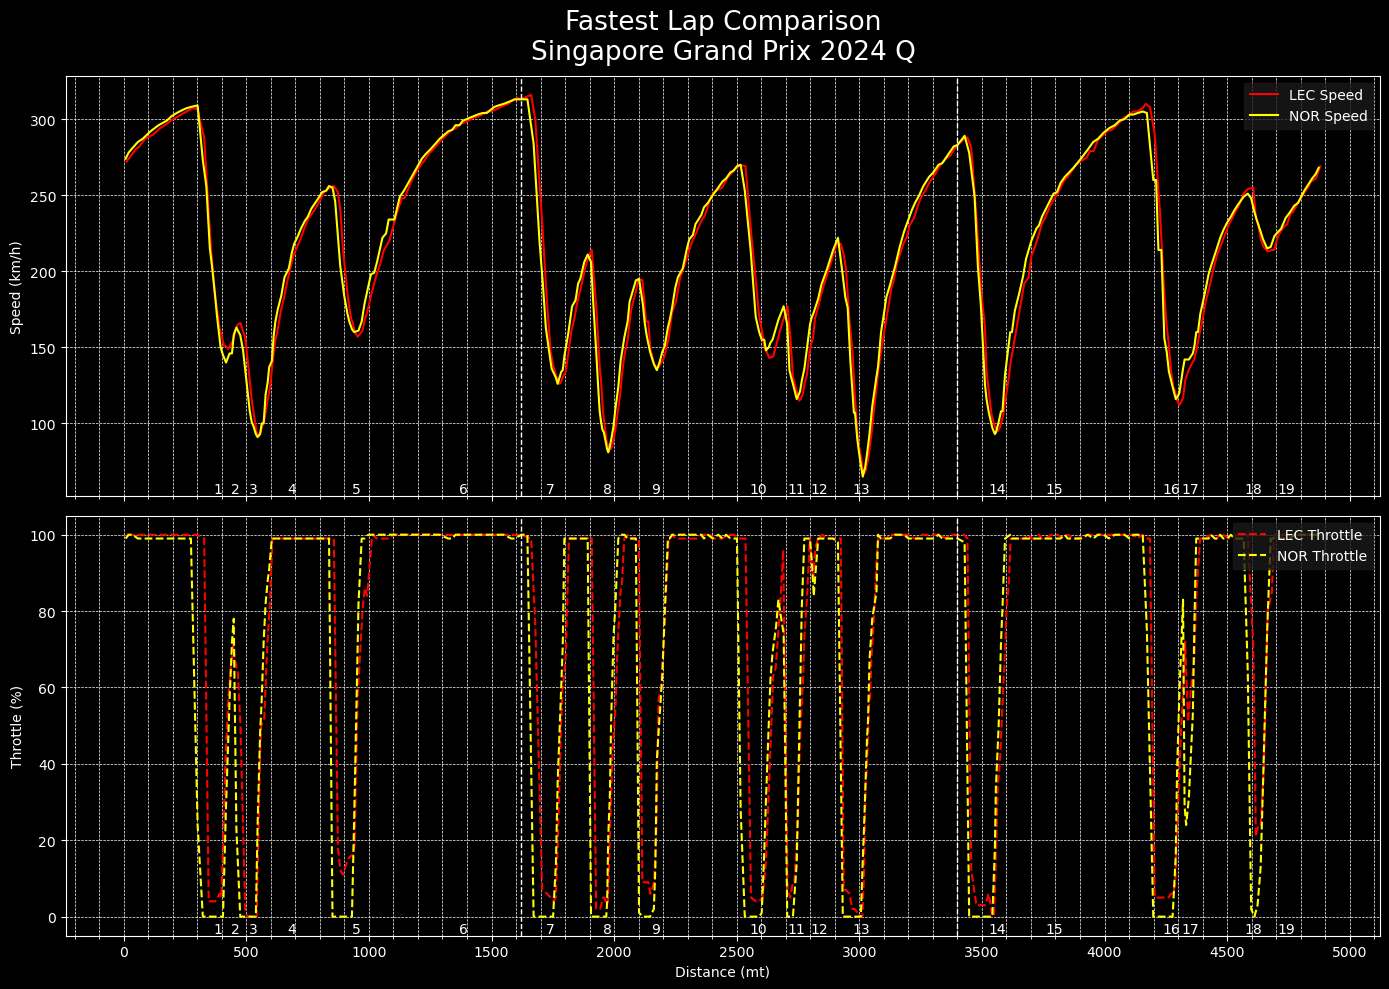

In [15]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_driver('LEC').pick_fastest()
SAI_FASTEST_LAP = transformed_laps.pick_driver('SAI').pick_fastest()
NOR_FASTEST_LAP = transformed_laps.pick_driver('NOR').pick_fastest()


# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
SAI_tel = SAI_FASTEST_LAP.get_car_data().add_distance()
NOR_tel = NOR_FASTEST_LAP.get_car_data().add_distance()

# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
ax1.plot(NOR_tel['Distance'], NOR_tel['Speed'], color='yellow', label='NOR Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Q", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(NOR_tel['Distance'], NOR_tel['Throttle'], color='yellow', linestyle='--', label='NOR Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


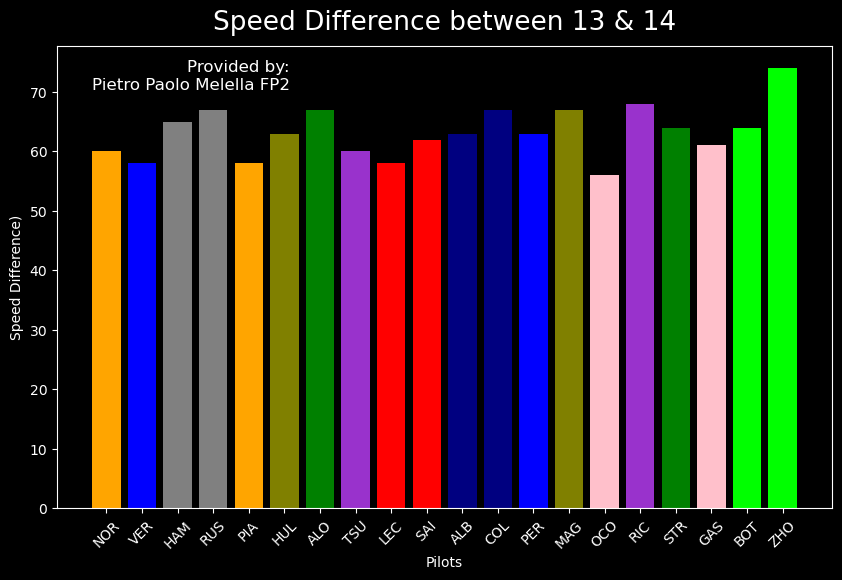

<Figure size 640x480 with 0 Axes>

In [20]:
speed_diff_t13_14= {}

for pilot in drivers:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting from t13 to t14
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[12] - 100)) & 
    (pilot_car_data['Distance'] < sector2_end_distance)]
    #selecting the data from the begging of sector to the last max speed with drs closed
    #computing the different 
    speed_diff_t13_14[pilot] = pilot_car_data_13_14 ['Speed'].max() - pilot_car_data_13_14 ['Speed'].iloc[0]



# Extract the pilots and speeds
pilots = list(speed_diff_t13_14.keys())
speeds = list(speed_diff_t13_14.values())
pilot_colors = [colors.get(pilot, 'black') for pilot in pilots]  # Default to black if color not found

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(pilots, speeds, color=pilot_colors)

# Add labels and title
plt.xlabel('Pilots')
plt.ylabel('Speed Difference)')
plt.title('Speed Difference between 13 & 14')

# Rotate pilot labels for better readability
plt.xticks(rotation=45)

# Add a signature in the lower-right corner with a newline
plt.text(
    0.3, 0.9, 'Provided by:\nPietro Paolo Melella FP2',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Show the plot
plt.show()

# Show plot
plt.tight_layout()
plt.show()

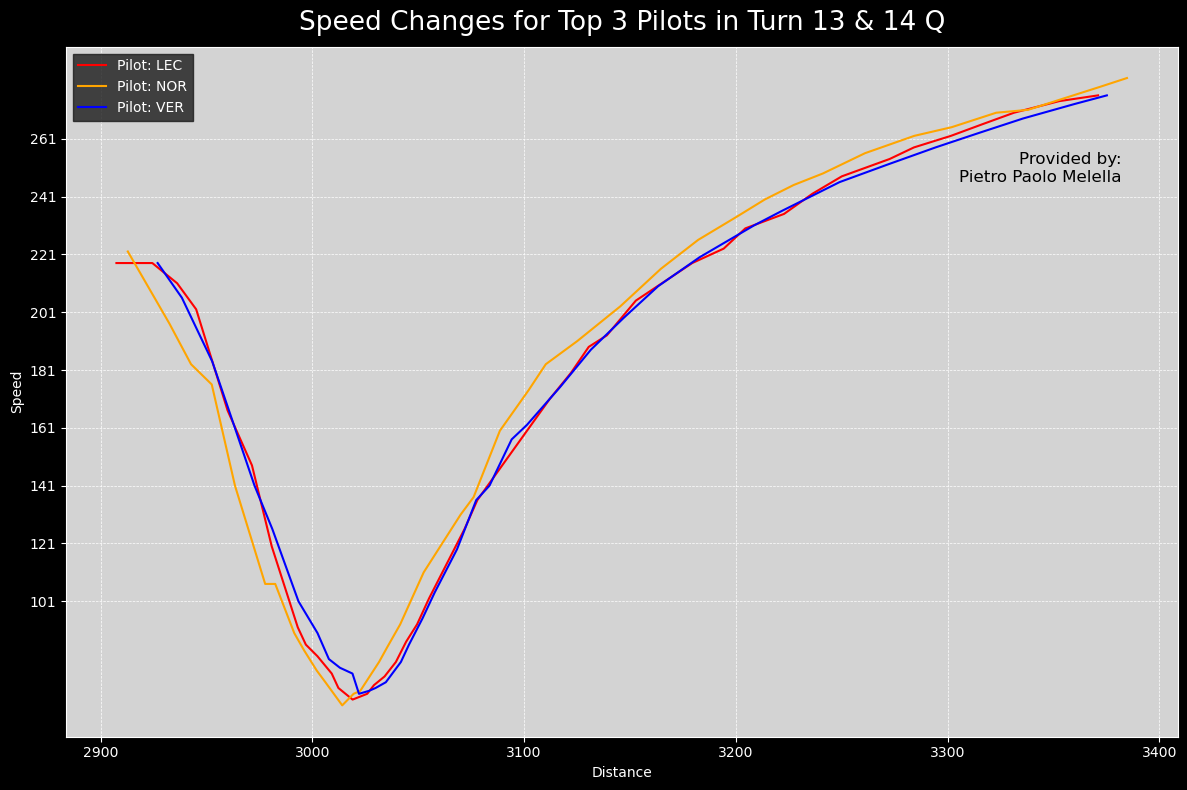

In [21]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))

# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

drivers_4 =['LEC', 'NOR', 'VER']

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting from t13 to t14
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[12] - 100)) & 
    (pilot_car_data['Distance'] < sector2_end_distance)]
    
    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_13_14['Distance'], pilot_car_data_13_14['Speed'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")
    
# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed Changes for Top 3 Pilots in Turn 13 & 14 Q')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Set y-axis ticks at intervals of 20
plt.yticks(range(int(min(pilot_car_data_13_14['Speed'].max(), 100)) + 1, int(max(pilot_car_data_13_14['Speed'].max(), 100)), 20))

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

/var/folders/3p/f1ks__ss09vf2m4_z_cm1ry40000gp/T/ipykernel_6631/3378982483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilot_car_data_13_14['Acceleration'] = ((pilot_car_data_13_14['Speed'].diff().fillna(0))/pilot_car_data_13_14['SessionTime'].dt.total_seconds().diff().fillna(0).fillna(0)).fillna(0)
/var/folders/3p/f1ks__ss09vf2m4_z_cm1ry40000gp/T/ipykernel_6631/3378982483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilot_car_data_13_14['Acceleration'] = ((pilot_car_data_13_14['Speed'].dif

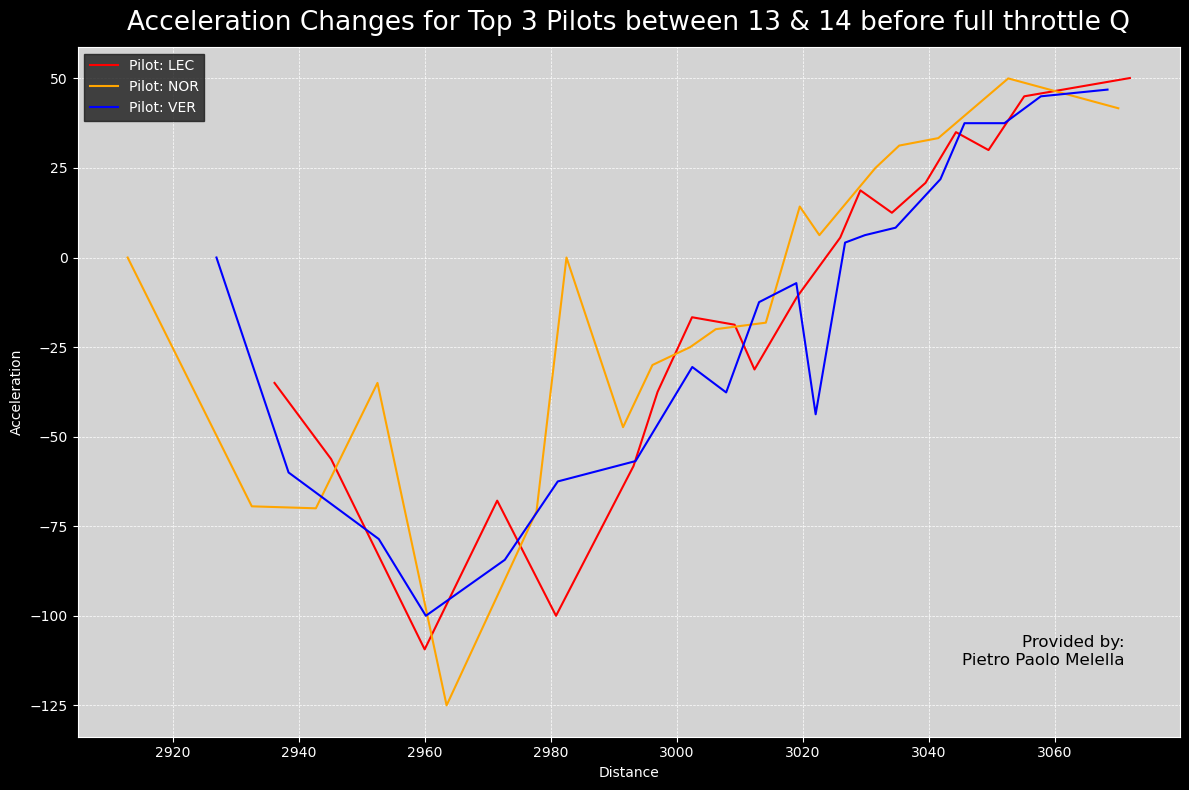

In [23]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')
# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting from t13 to t14
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[12] - 100)) & 
    (pilot_car_data['Distance'] < sector2_end_distance)]

    pilot_car_data_13_14['Acceleration'] = ((pilot_car_data_13_14['Speed'].diff().fillna(0))/pilot_car_data_13_14['SessionTime'].dt.total_seconds().diff().fillna(0).fillna(0)).fillna(0)

    pilot_car_data_t13_14_throttle_99 = pilot_car_data_13_14[pilot_car_data_13_14['Throttle']<99].reset_index()



    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_t13_14_throttle_99['Distance'], pilot_car_data_t13_14_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")


# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 3 Pilots between 13 & 14 before full throttle Q')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


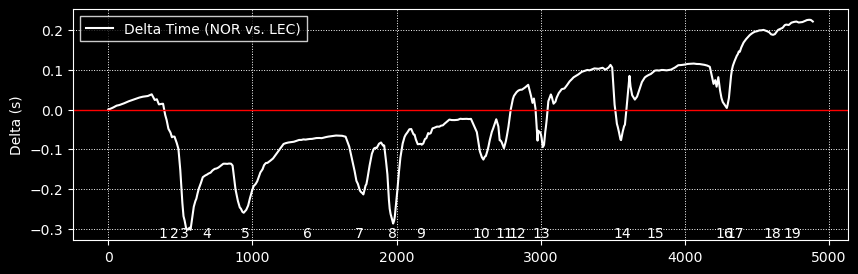

In [24]:
# Assuming `delta_time`, `ref_tel`, and `compare_tel` are already calculated
# If you haven't calculated delta_time, ref_tel, and compare_tel:
delta_time, ref_tel, compare_tel = utils.delta_time(NOR_FASTEST_LAP, LEC_FASTEST_LAP)

# Extract 'Distance' from the corners DataFrame
corner_distances = circuit_info.corners['Distance']

# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Sequential corner numbers

# Create the plot
plt.figure(figsize=(10, 3))  # Wide figure for the delta plot
ax1 = plt.gca()

# Plot the delta time between the two laps
ax1.plot(ref_tel['Distance'], delta_time, color='white', label='Delta Time (NOR vs. LEC)')  # White line for delta

# Add a red horizontal line at y=0
ax1.axhline(0, color='red', linewidth=1)

# Customize the plot background and grid
ax1.set_facecolor('black')  # Black background
ax1.grid(True, color='white', linestyle=':', linewidth=0.7)  # Dotted white grid

# Annotate the plot with corner numbers
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, 
             verticalalignment='bottom', horizontalalignment='center')

# Customize the y-axis label and ticks
ax1.set_ylabel('Delta (s)', color='white')

# Set the color of the axis ticks and labels to white
ax1.tick_params(axis='both', colors='white')

# Customize the spines (axes lines)
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')

# Add a legend to explain the plot elements
ax1.legend(loc='upper left', facecolor='black', edgecolor='white', fontsize=10, labelcolor='white')

# Show the plot
plt.show()

In [13]:
#to fix

#import torch

def delta_time_pytorch(reference_lap, compare_lap):
    """
    Calculate the delta time between two laps using PyTorch for interpolation and computation.
    
    Args:
        reference_lap (pd.Series): The lap taken as reference
        compare_lap (pd.Series): The lap to compare
    
    Returns:
        tuple: (delta, reference, comparison)
          - torch.Tensor with the delta in seconds.
          - Dictionary for the reference lap telemetry
          - Dictionary for the comparison lap telemetry
    """

    # Extract telemetry and convert to PyTorch tensors
    ref = reference_lap.get_car_data(interpolate_edges=True).add_distance()
    comp = compare_lap.get_car_data(interpolate_edges=True).add_distance()

    ref_distance = torch.tensor(ref['Distance'].to_numpy(), dtype=torch.float32)
    ref_time = torch.tensor(ref['Time'].dt.total_seconds().to_numpy(), dtype=torch.float32)

    comp_distance = torch.tensor(comp['Distance'].to_numpy(), dtype=torch.float32)
    comp_time = torch.tensor(comp['Time'].dt.total_seconds().to_numpy(), dtype=torch.float32)

    # Interpolation function using PyTorch
    def linear_interpolate(x, xp, fp):
        # Clamping values to avoid extrapolation
        x = torch.clamp(x, xp.min(), xp.max())
        
        indices = torch.searchsorted(xp, x, right=True) - 1
        indices = torch.clamp(indices, 0, len(xp) - 2)

        x0 = xp[indices]
        x1 = xp[indices + 1]
        y0 = fp[indices]
        y1 = fp[indices + 1]
        
        # Linear interpolation formula
        slope = (y1 - y0) / (x1 - x0)
        return y0 + slope * (x - x0)

    # Perform linear interpolation for lap time along the reference lap distance
    lap_time_interpolated = linear_interpolate(ref_distance, comp_distance, comp_time)

    # Calculate the delta between interpolated comparison lap and reference lap
    delta = lap_time_interpolated - ref_time

    return delta, ref, comp


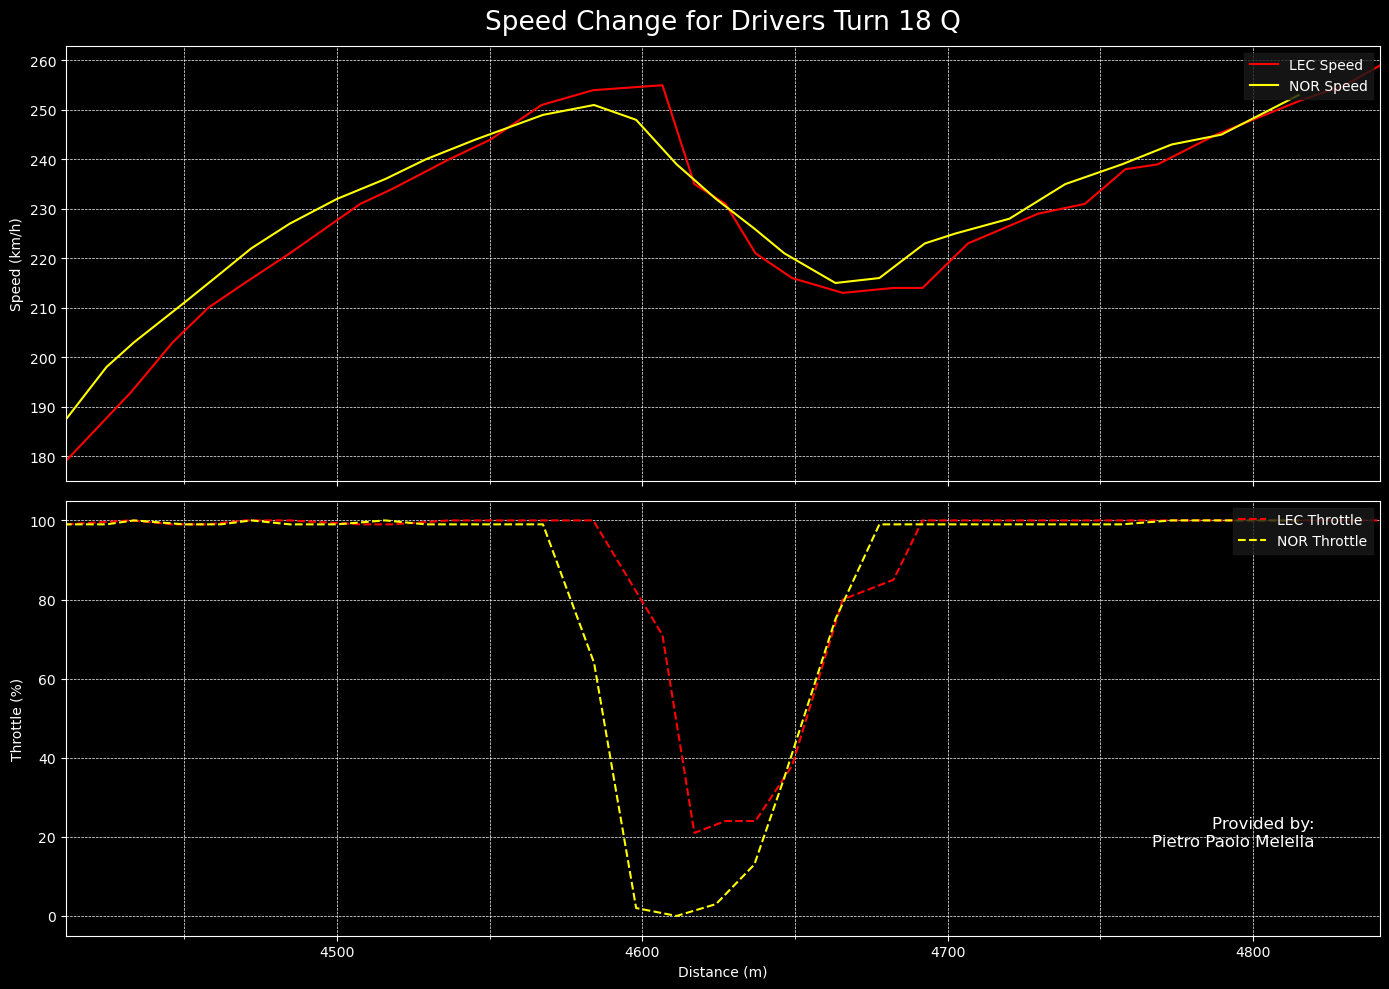

In [25]:
LEC_tel_turn18 = LEC_tel[(LEC_tel['Distance'] > (corner_distances[17] - 200)) & (LEC_tel['Distance'] < (corner_distances[18] + 100))]

NOR_tel_turn18 = NOR_tel[(NOR_tel['Distance'] > (corner_distances[17] - 200)) & (NOR_tel['Distance'] < (corner_distances[18] + 100))]

# Define the minimum and maximum distance values from LEC_tel_turn18 to set the x-axis limits
min_distance = LEC_tel_turn18['Distance'].min()
max_distance = LEC_tel_turn18['Distance'].max()

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel_turn18['Distance'], LEC_tel_turn18['Speed'], color='red', label='LEC Speed')
ax1.plot(NOR_tel_turn18['Distance'], NOR_tel_turn18['Speed'], color='yellow', label='NOR Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title('Speed Change for Drivers Turn 18 Q', color='white')

# Set x-axis limits based on the LEC_tel_turn18['Distance'] range
ax1.set_xlim([min_distance, max_distance])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(100))  # Adjust this as needed for better scaling
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(50))

# Plot Throttle on the second subplot
ax2.plot(LEC_tel_turn18['Distance'], LEC_tel_turn18['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(NOR_tel_turn18['Distance'], NOR_tel_turn18['Throttle'], color='yellow', linestyle='--', label='NOR Throttle')
ax2.set_xlabel('Distance (m)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')

# Set x-axis limits based on the LEC_tel_turn18['Distance'] range
ax2.set_xlim([min_distance, max_distance])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(100))  # Adjust this as needed for better scaling
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(50))

# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

plt.text(
    0.95, 0.2, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Adjust layout
plt.tight_layout()
plt.show()

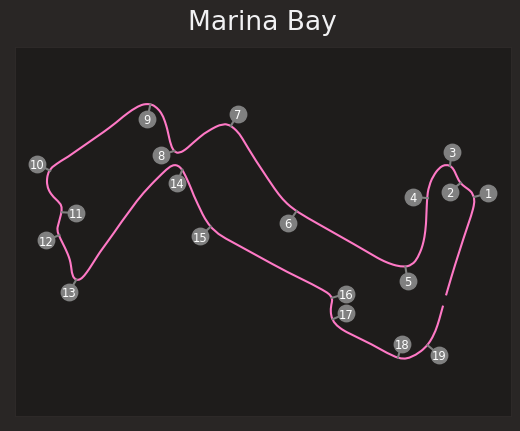

In [14]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
    

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()
